In [1]:
import matplotlib
import loadnotebook
from helper import * 

importing Jupyter notebook from helper.ipynb


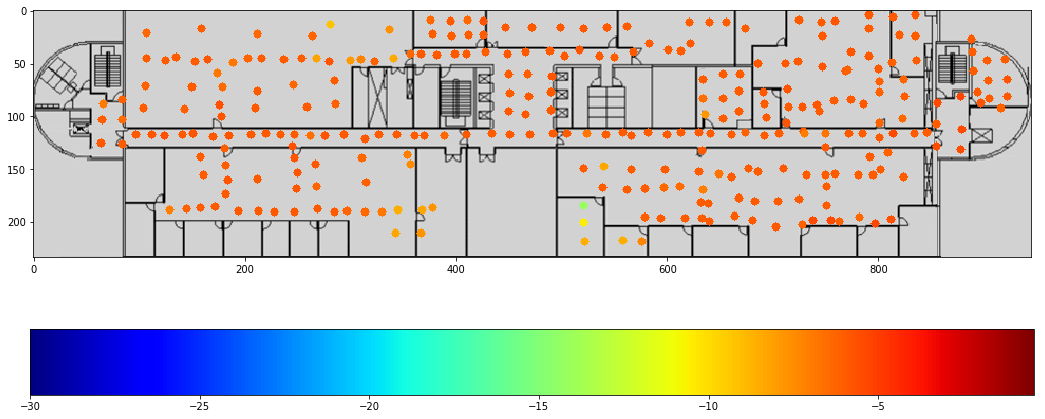

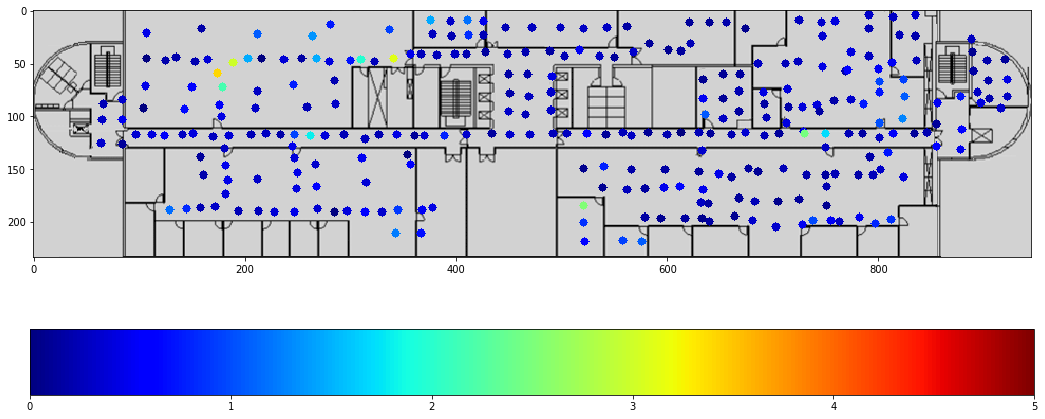

In [2]:
#Check the priority and set first
#And modify whitelist in helper
#lock_pci and pci_locker are for single pci map
'''
import sys
set_value = sys.argv[1]
pci_locker = int(sys.argv[2])
if pci_locker == 0:
    lock_pci = False
else:
    lock_pci = True
    '''
priority = 6
set_value = 1

#Set lock_pci = True, if you want to show the map for one specific pci
#And the pci_locker is which pci you want 

lock_pci = False
pci_locker = 13

#to check is there a missing point we need to regather

source = get_source(priority, set_value)

#make sure there is the correct path for file to put in
output_csv = "../results/demo_priority_" + str(priority) + "/set" + str(set_value) + ".csv"
    
def get_output_image(prefix="") :
    if lock_pci and pci_locker in whitelist_PCI:
        return "../results/demo_priority_" + str(priority) + "/images/set" + \
            str(set_value) +"/"+str(pci_locker)+ "_" + prefix + ".png"
    else:
        return "../results/demo_priority_" + str(priority) + "/images/set" + \
            str(set_value) + "_" + prefix + ".png"
    
result = pd.read_csv(output_csv) #read csv as df
#LOCK THE PCI

if lock_pci and pci_locker in whitelist_PCI:
    filter = result["PCI"] == pci_locker
    result=result[filter]
#RSRQ Location Map

df = result.dropna(subset=["RSRQ"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
rsrq_list = df["RSRQ"].astype('int32')
pci_list = df["PCI"].astype('int32')

rsrq_summary = summary_based_on_location2(lat_list, lon_list, pci_list, rsrq_list)
rsrq_summary = summary_dict2(rsrq_summary, np.array)
rsrq_summary = filtering_dict(rsrq_summary, np.array)

#RSRQ Location Map_mean

normalize_rsrq_mean = matplotlib.colors.Normalize(vmin=-30, vmax=-0.4)
rsrq_mean = summary_dict2(rsrq_summary, np.mean)
x_list, y_list, rsrq_mean_list = summary_dict_to_list(rsrq_mean)
colors_rsrq_mean = [cmap(normalize_rsrq_mean(value))[:3] for value in rsrq_mean_list]
colors_rsrq_mean = [[int(x*255) for x in value] for value in colors_rsrq_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrq_mean,
                               cmap, normalize_rsrq_mean, get_output_image("rsrq_mean"))

#RSRQ Location Map_std

normalize_rsrq_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
rsrq_std = summary_dict2(rsrq_summary, np.std)
x_list, y_list, rsrq_std_list = summary_dict_to_list(rsrq_std)
colors_rsrq_std = [cmap(normalize_rsrq_std(value))[:3] for value in rsrq_std_list]
colors_rsrq_std = [[int(x*255) for x in value] for value in colors_rsrq_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrq_std,
                               cmap, normalize_rsrq_std, get_output_image("rsrq_std"))


